- 报告涵盖
    - 选题的原因
    - 题目的背景
    - 题目的具体实现、原理的描述
    - 题目具体的应用
    - 总结

### IV的概念和作用（做特征选择的，并列于PCA、方差过滤）
- 概念：
    - IV的全称是Information Value，中文意思是信息价值，或者信息量。
- 作用：
    - 我们构建分类模型时，经常需要对特征进行筛选。比如我们有200个候选特征，通常情况下，不会直接把200个特征直接放到模型中去进行训练，而是会用一些方法，从这200个特征中挑选一些出来，放进模型，形成训练集数据。那么我们怎么去挑选训练模型的特征呢？
    - 挑选特征的过程是个比较复杂的过程，需要考虑的因素很多，比如：特征的预测能力，特征之间的相关性，特征在业务上的可解释性等等。但是，其中最主要和最直接的衡量标准是特征的预测能力。
        - “变量的预测能力”这个说法很笼统，在筛选变量的时候我们总不能说：“我觉得这个变量预测能力很强，所以他要进入模型”吧？我们需要一些具体的量化指标来衡量每自变量的预测能力，并根据这些量化指标的大小，来确定哪些变量进入模型。【IV就是这样一种指标，他可以用来衡量自变量的预测能力】越大越好。

### 对IV的理性理解
- 想要深入理解IV其核心就是要理解“用IV去衡量变量预测能力”这句话。
    - 我们假设在一个分类问题中，目标变量的类别有两类：Y1，Y2。对于一个待预测的样本A，要判断A属于Y1还是Y2，我们是需要一定的信息，假设这个信息总量是I，而这些所需要的信息，就蕴含在所有的待预测样本的特征C1，C2，C3，……，Cn中，那么，对于其中的一个特征Ci来说，其蕴含的信息越多，那么它对于判断A属于Y1还是Y2的贡献就越大，Ci的信息价值就越大，Ci的IV就越大，它就越应该进入到入模变量列表中。

### IV的计算
- 前面我们对IV进行了解释和描述，那么回到数学层面，对于一个待评估特征，他的IV值究竟如何计算呢？为了介绍IV的计算方法，我们首先需要认识和理解另一个概念——WOE，因为IV的计算是以WOE为基础的。

### 分箱
- woe是需要建立在分箱操作之上的
- 数据分箱（也称为离散分箱或分段）是一种【数据预处理技术】（并列于归一化、标准化），用于减少次要观察误差的影响，是一种将多个连续值分组为较少数量的“分箱”的方法。【说白了就是将连续型特征进行离散化】。

- 例如，例如我们有一组关于人年龄的数据，如下图所示：
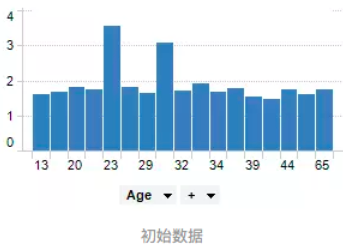

- 现在我们希望将他们的年龄分组到更少的间隔中，可以通过设置一些条件来实现：
    - 对连续性变量的离散化
    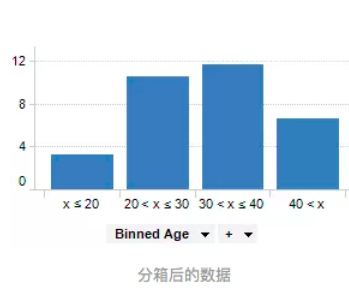

- 分箱的作用&意义
    - 离散特征的增加和减少都很容易，易于模型的快速迭代，提升计算速度
    - 特征离散化后，模型会更稳定，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。
    - 特征离散化以后，起到了简化了模型的作用，可以适当降低了模型过拟合的风险。
    

- 分箱的实现
    - 等距分箱
    - 等频分箱

In [3]:
#等距分箱
import pandas as pd
pd.cut([1,2,3,4,5,6,7,8,9,0],bins=3).value_counts()

(-0.009, 3.0]    4
(3.0, 6.0]       3
(6.0, 9.0]       3
dtype: int64

In [4]:
pd.cut([1,2,3,4,5,6,7,8,9,0],bins=3,labels=['A','B','C']).value_counts()

A    4
B    3
C    3
dtype: int64

In [5]:
#把连续型变量用A B C表示，[A,A,A,B,B,B,C,C,C,A]成为离散变量

In [9]:
#等频分箱
import numpy as np
data = np.random.randint(10,100,size=(30,))
pd.qcut(data,q=5).value_counts()

(9.999, 33.0]    6
(33.0, 51.2]     6
(51.2, 73.6]     6
(73.6, 83.2]     6
(83.2, 99.0]     6
dtype: int64

- cut和qcut的区别：
    - 1，cut: 按连续数据的大小分到各个桶里，每个桶里样本量可能不同，但是，每个桶相当于一个等长的区间，即：以数据的最大和最小为边界，等分成p个桶。

    - 2，qcout: 与cut主要的区别就是每个桶里的样本数量是一定的。

- 注意：分箱后就可以求解出IV和WOE的值了。如果想对连续性特征进行离散化，需要对分箱后的每组（箱）数据进行woe或者iv编码，然后才能放进模型训练。

### 什么是WOE
- WOE的全称是“Weight of Evidence”，即证据权重。WOE是对原始特征的一种编码形式。要对一个特征进行WOE编码，需要首先把这个变量进行分组处理（也叫离散化、分箱等等，说的都是一个意思）。分组后，对于第i组，WOE的计算公式如下：
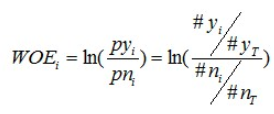
    - 其中，pyi是这个组中正例样本占整个样本中正例样本的比例，pni是这个组中负例样本占整个样本中负例样本的比例，#yi是这个组中正例样本的数量，#ni是这个组中负例样本的数量，#yT是整个样本中所有正例样本的数量，#nT是整个样本中所有负例样本的数量。

- 从这个公式中我们可以体会到，WOE表示的实际上是“当前分组中正例样本占所有样本中所有正例样本的比例”和“当前分组中负例样本占所有样本中所有负例样本比例”的差异。

- 对这个公式做一个简单变换，可以得到：
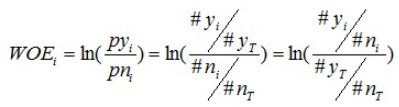
    - 变换以后我们可以看出，WOE也可以这么理解，他表示的是当前这个组中响应的客户和未响应客户的比值，和所有样本中这个比值的差异。这个差异是用这两个比值的比值，再取对数来表示的。WOE越大，这种差异越大，这个分组里的样本响应的可能性就越大（这组数据分到正例的概率越大），WOE越小，差异越小，这个分组里的样本响应的可能性就越小。
        - 对于一组样本数据，上述公式中的分母是固定的，如果分子中的yi越大，则WOE返回的数值越大

### IV的计算公式
- 有了前面的介绍，我们可以正式给出IV的计算公式。对于一个分组后的变量对应的IV值，计算公式如下：
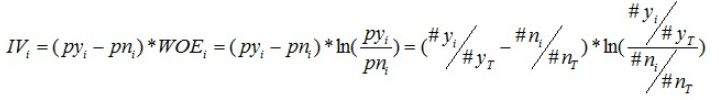

#### 注意：(py-pn)*WOE中的py必须为某组数据中正例样本数量/样本集中所有正例样本的数量，pn为某组数据中反例样本/样本集中所有反例样本的数量

- 有了一个特征各分组的IV值，我们就可以计算整个特征的IV值，方法很简单，就是把各分组的IV相加：其中n就是分组的个数
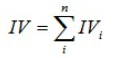

### 用实例介绍IV的计算和使用

- 例子
    - 假设现在某个公司举行一个活动，在举行这个活动之前，先在小范围的客户中进行了一次试点，收集了一些用户对这次活动的一些响应，然后希望通过这些数据，去构造一个模型，预测如果举行这次的活动，是否能够得到很好的响应或者得到客户的响应概率之类。
    - 假设我们已经从公司客户列表中随机抽取了100000个客户进行了营销活动测试，收集了这些客户的响应结果，作为我们的建模数据集，其中响应的客户有10000个。另外假设我们也已经提取到了这些客户的一些变量，作为我们模型的候选变量集，这些变量包括以下这些:
        - 最近一个月是否有购买；

        - 最近一次购买金额；

        - 最近一笔购买的商品类别；

        - 是否是公司VIP客户；
    - 假设，我们已经对这些变量进行了离散化，统计的结果如下面几张表所示。


- (1) 最近一个月是否有过购买：
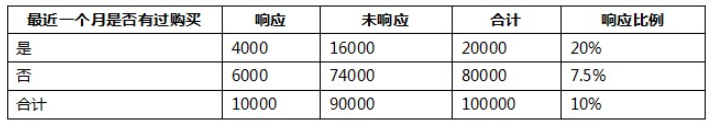

- (2) 最近一次购买金额：
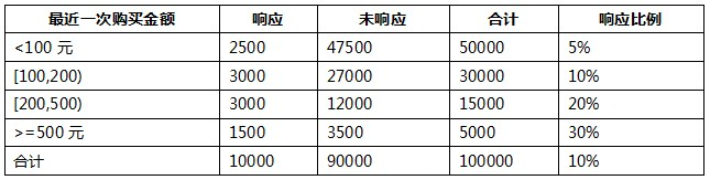

- (3) 最近一笔购买的商品类别：
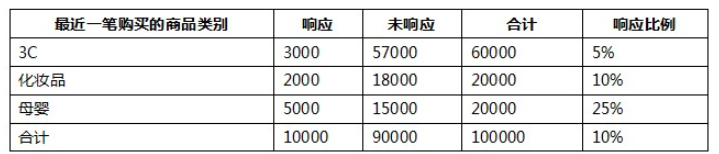


- (4) 是否是公司VIP客户：
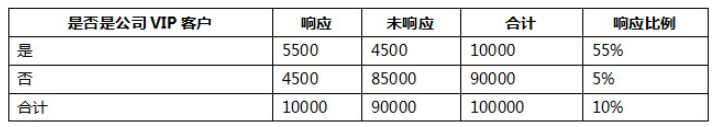


### 计算WOE和IV

- 我们以其中的一个变量“最近一次购买金额”变量为例：
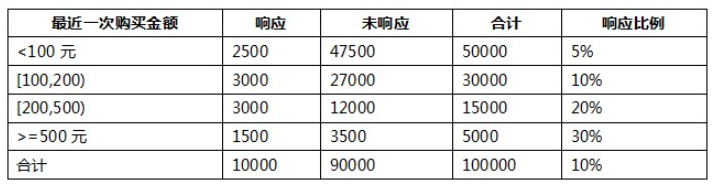

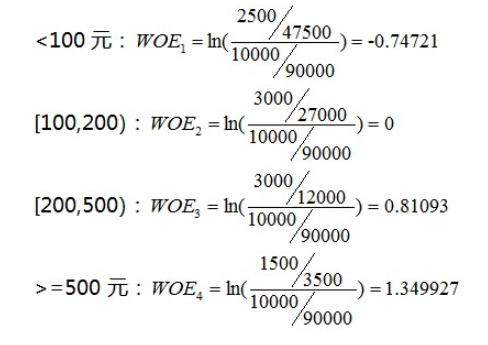

- 我们把这个变量离散化为了4个分段：<100元，[100,200)，[200,500)，>=500元。首先，根据WOE计算公式，这四个分段的WOE分别为：
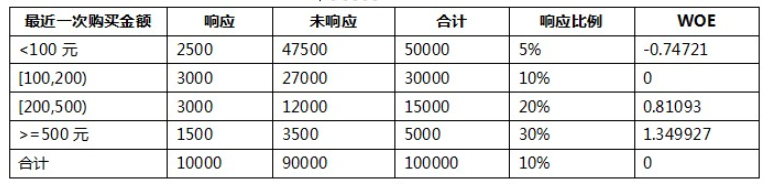

- 从上面的计算结果中我们可以看一下WOE的基本特点：
    - 当前分组中，响应的比例越大，WOE值越大；
    - 当前分组WOE的正负，由当前分组响应和未响应的比例，与样本整体响应和未响应的比例的大小关系决定，当前分组的比例小于样本整体比例时（分子小于分母），WOE为负，当前分组的比例大于整体比例时（分子大于分母），WOE为正，当前分组的比例和整体比例相等时（分子等于分母），WOE为0。

- 我们进一步理解一下WOE，会发现，WOE其实描述了某一特征的当前这个分组，对判断该特征是否会响应（或者说属于哪个类）所起到不同的影响，当WOE为正时，特征当前取值对判断个体是否会响应起到的正向的影响，当WOE为负时，起到了负向影响。而WOE值的大小，则是这个影响的大小的体现。

- 回到正题，计算完WOE，我们分别计算四个分组的IV值：
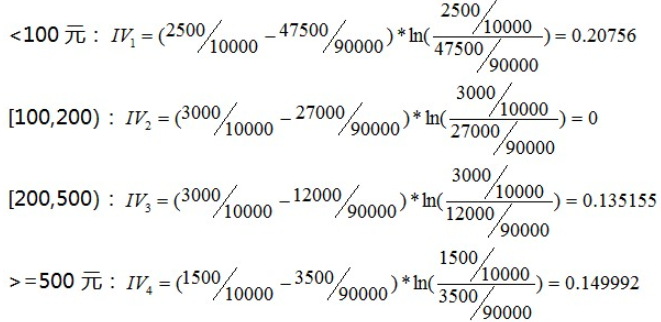

- 从上面IV的计算结果我们可以看出IV的以下特点：
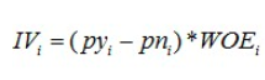
    - 对于特征的一个分组，这个分组的响应和未响应的比例与样本整体响应和未响应的比例（WOE）相差越大，IV值越大，否则，IV值越小；
    - 极端情况下，当前分组的响应和未响应的比例和样本整体的响应和未响应的比例相等时，IV值为0；

- 我们计算变量总IV值：
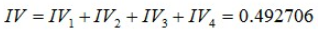

### IV值的比较和变量预测能力的排序
- 我们已经计算了四个特征中其中一个特征（最近一次购买金额）的WOE和IV值。另外三个的计算过程我们不再详细的说明，直接给出IV结果。
    - 最近一次购买金额的IV为0.49270645
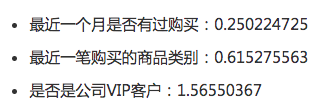

- 这四个特征IV排序结果是这样的：是否是公司VIP客户 > 最近一笔购买的商品类别 > 最近一次购买金额 > 最近一个月是否有过购买。我们发现“是否是公司VIP客户”是预测能力最高的特征，“最近一个月是否有过购买”是预测能力最低的特征。如果我们需要在这四个变量中去挑选特征，就可以根据IV从高到低去挑选了。

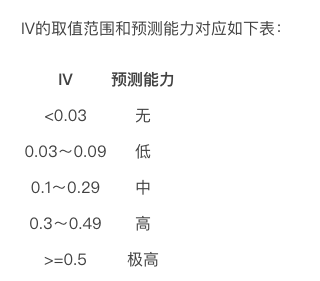

### 关于IV和WOE的进一步思考：为什么用IV而不是直接用WOE
- 从上面的内容来看，特征各分组的WOE和IV都隐含着这个分组对目标变量的预测能力这样的意义。那我们为什么不直接用WOE相加或者绝对值相加作为衡量一个变量整体预测能力的指标呢？
- 并且，从计算公式来看，对于特征的一个分组，IV是WOE乘以这个分组响应占比和未响应占比的差。而一个特征的IV等于各分组IV的和。如果愿意，我们同样也能用WOE构造出一个这样的一个和出来，我们只需要把特征各个分组的WOE和取绝对值再相加，（取绝对值是因为WOE可正可负，如果不取绝对值，则会把特征的区分度通过正负抵消的方式抵消掉）：
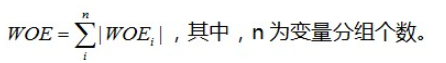

- 那么我们为什么不直接用这个WOE绝对值的加和来衡量一个变量整体预测能力的好坏，而是要用WOE处理后的IV呢。
- 我们这里给出两个原因。IV和WOE的差别在于IV在WOE基础上乘以的那个（py-pn），我们暂且用pyn来代表这个值。
    - 第一个原因，当我们衡量一个特征的预测能力时，我们所使用的指标值不应该是负数，否则，说一个特征的预测能力的指标是-2.3，听起来很别扭。从这个角度讲，乘以pyn这个系数，保证了特征每个分组的结果都是非负数，你可以验证一下，当一个分组的WOE是正数时，pyn也是正数，当一个分组的WOE是负数时，pyn也是负数，而当一个分组的WOE=0时，pyn也是0。
        - 当然，上面的原因不是最主要的，因为其实我们上面提到的绝对值这个指标也可以完全避免负数的出现。
    - 更主要的原因，也就是第二个原因是，乘以pyn后，体现出了特征当前分组中个体的数量占整体个体数量的比例，对变量预测能力的影响。怎么理解这句话呢？我们还是举个例子。
        - 假设我们上面所说的营销响应模型中，还有一个特征A，其取值只有两个：0,1，将特征A分成两组0和1。数据如下：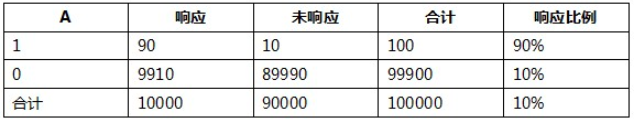

- 我们从上表可以看出，当特征A取值1时，其响应比例达到了90%，非常的高，但是我们能否说特征A的预测能力非常强呢？不能。为什么呢？原因就在于，A取1时，响应比例虽然很高，但这个分组的客户数太少了，占的比例太低了。虽然，如果一个客户在A这个特征上取1，那他有90%的响应可能性，但是一个客户特征A取1的可能性本身就非常的低。所以，对于样本整体来说，变量的预测能力并没有那么强。我们分别看一下变量各分组和整体的WOE，IV。
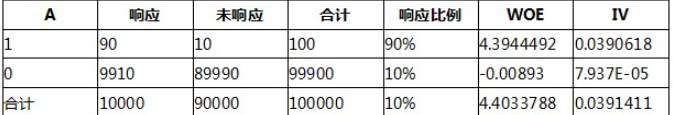

- 从这个表我们可以看到，特征取1时，响应比达到90%，对应的WOE很高，但对应的IV却很低，原因就在于IV在WOE的前面乘以了一个系数（py-pn），而这个系数很好的考虑了这个分组中样本占整体样本的比例，比例越低，这个分组对特征整体预测能力的贡献越低。相反，如果直接用WOE的绝对值加和，会得到一个很高的指标，这是不合理的。